In [1]:

# First import library
import pyrealsense2 as rs
# Import Numpy for easy array manipulation
import numpy as np
# Import OpenCV for easy image rendering
import cv2
# Import argparse for command-line options
import argparse
# Import os.path for file path manipulation
import os.path

## If Using Realsense Camera

In [15]:
pipeline = rs.pipeline()

# Create a config and configure the pipeline to stream
#  different resolutions of color and depth streams
config = rs.config()

# Get device product line for setting a supporting resolution
pipeline_wrapper = rs.pipeline_wrapper(pipeline)
pipeline_profile = config.resolve(pipeline_wrapper)
device = pipeline_profile.get_device()
        
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

profile = pipeline.start(config)

depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()

# the depth scale is the multiplier to the number that the 

align_to = rs.stream.color
align = rs.align(align_to)

In [13]:
pipeline.stop()

RuntimeError: stop() cannot be called before start()

## If Using .BAG File

In [2]:
## define path to bag
bag_path = '/home/richard/realsense_workshop/day_1_pm/resources/desk_bgr8_f15.bag'

# Create pipeline
pipeline = rs.pipeline()
# Create a config object
config = rs.config()
# Tell config that we will use a recorded device from file to be used by the pipeline through playback.
rs.config.enable_device_from_file(config, bag_path)

# pipeline_wrapper = rs.pipeline_wrapper(pipeline)
# pipeline_profile = config.resolve(pipeline_wrapper)
# Configure the pipeline to stream the depth stream
# Change this parameters according to the recorded bag file resolution
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 15)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 15)

# pipeline would not resolve if the config does not match or if the config is not possible
profile = pipeline.start(config)

depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()

# the depth scale is the multiplier to the number that the 

align_to = rs.stream.color
align = rs.align(align_to)

# Create opencv window to render image in

# Create colorizer object
colorizer = rs.colorizer()

depth_profile = rs.video_stream_profile(profile.get_stream(rs.stream.depth))
depth_intrinsics = depth_profile.get_intrinsics()
w, h = depth_intrinsics.width, depth_intrinsics.height

pc = rs.pointcloud()



NameError: name 'rs' is not defined

Frame Loop

In [1]:
frames = pipeline.wait_for_frames()
# frames.get_depth_frame() is a 640x360 depth image

# Align the depth frame to color frame
aligned_frames = align.process(frames)

# Get aligned frames
aligned_depth_frame = aligned_frames.get_depth_frame() # aligned_depth_frame is a 640x480 depth image
color_frame = aligned_frames.get_color_frame()

# Validate that both frames are valid
if not aligned_depth_frame or not color_frame:
    pass

depth_image = np.asanyarray(aligned_depth_frame.get_data())
color_image = np.asanyarray(color_frame.get_data())

depth_intrinsics = rs.video_stream_profile(aligned_depth_frame.profile).get_intrinsics()

depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

points = pc.calculate(aligned_depth_frame)
pc.map_to(color_frame)

NameError: name 'pipeline' is not defined

In [51]:
v, t = points.get_vertices(), points.get_texture_coordinates()
verts = np.asanyarray(v).view(np.float32).reshape(480, 640, 3)  # xyz
texcoords = np.asanyarray(t).view(np.float32).reshape(480, 640, 2)  # uv

In [50]:
verts.shape

(480, 640, 3)

In [52]:
texcoords.shape

(480, 640, 2)

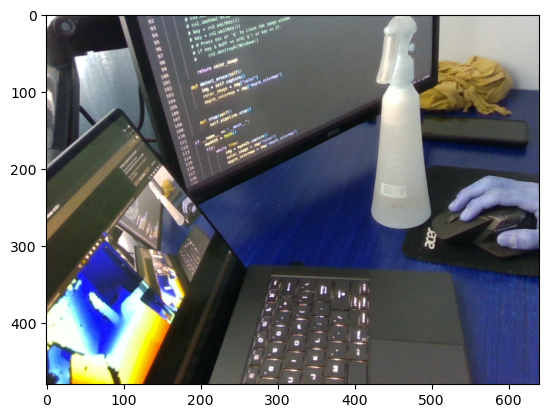

In [8]:
import matplotlib.pyplot as plt

color_image_rgb = cv2.cvtColor(color_image,cv2.COLOR_BGR2RGB)
plt.imshow(color_image_rgb)

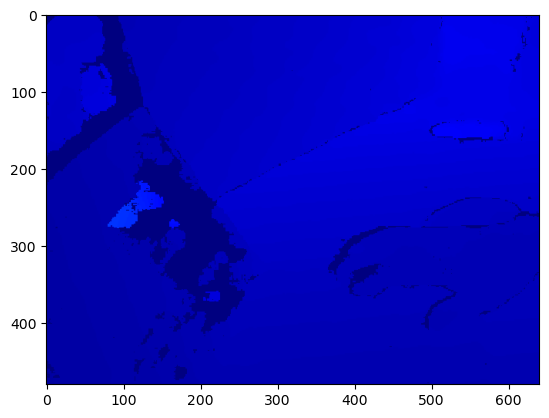

In [23]:
depth_image_rgb = cv2.cvtColor(depth_colormap,cv2.COLOR_BGR2RGB)
plt.imshow(depth_image_rgb)

In [9]:
# stop the camera
pipeline.stop()